### Imports and load the data

In [107]:
from showupforhealth.utils import perform_train_test_split, scale_df
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
pd.set_option('display.max_columns', 40)

In [105]:
data = pd.read_csv('/Users/alessio/code/janduplessis883/data-showup/data/output-data/full_train_data.csv')

In [106]:
data.head()

,Appointment_status,temp,precipitation,Age,Sex,FRAILTY,DEPRESSION,OBESITY,IHD,DM,HPT,NDHG,SMI,IMD2023,dist_to_station,distance_to_surg,book_to_app_days,booked_by_clinician,registered_for_months,sin_week,cos_week,sin_Appointment_time,cos_Appointment_time,sin_month,cos_month,sin_day_of_week,cos_day_of_week,No_shows,Rota_ARRS,Rota_GP,Rota_HCA,Rota_Nurse,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed,Ethnicity_Other,Ethnicity_White
0,1,17.7,0.0,40,0,0.00,0,0,0,0,0,0,0,22698.0,0.519419,0.816996,54.0,1,17.0,-0.120537,-0.992709,0.707107,-0.707107,-0.5,-0.866025,0.781831,0.623490,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,18.5,0.0,70,2,0.39,0,1,0,1,1,0,0,10169.0,0.540792,1.656309,49.0,0,12.0,-0.120537,-0.992709,0.500000,-0.866025,-0.5,-0.866025,0.781831,0.623490,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1,18.5,0.0,70,2,0.39,0,1,0,1,1,0,0,10169.0,0.540792,1.656309,49.0,0,12.0,-0.120537,-0.992709,0.500000,-0.866025,-0.5,-0.866025,0.781831,0.623490,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1,19.4,0.0,66,2,0.03,1,0,0,0,1,0,0,8243.0,0.332691,0.600495,37.0,0,70.0,-0.120537,-0.992709,0.258819,-0.965926,-0.5,-0.866025,0.433884,-0.900969,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,18.3,0.0,58,0,0.11,0,1,0,0,0,0,0,7626.0,0.155802,0.215224,27.0,0,28.0,-0.120537,-0.992709,0.707107,-0.707107,-0.5,-0.866025,0.433884,-0.900969,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [100]:
data['Sex'].value_counts()

0    571356
2    330086
1        52
3        22
Name: Sex, dtype: int64

In [110]:
data['cos_day_of_week'].value_counts()

 0.623490    189081
 1.000000    186001
-0.900969    180086
-0.222521    169934
-0.900969    168770
-0.222521      7620
 0.623490        24
Name: cos_day_of_week, dtype: int64

### Split data in X and y

In [63]:
X = data_shuffle.drop(columns=['Appointment_status'])
y = data_shuffle['Appointment_status']

### Split train and test

In [64]:
X_train, X_test, y_train, y_test = perform_train_test_split(X,y)

✅ OUTPUT: X_train, X_test, y_train, y_test
Train Set:  X_train, y_train - (721212, 36), (721212,)
 Test Set:  X_test, y_test - - (180304, 36), (180304,)


### Oversample training data with SMOTE

In [38]:
def oversample_with_smote(X_train, y_train, sampling_strategy='auto', k_neighbors=5, random_state=42):
    smote = SMOTE(sampling_strategy=sampling_strategy, k_neighbors=k_neighbors, random_state=random_state)
    X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)
    print(f'✅ Data Oversampled: SMOTE - X_train_oversampled:{X_train_oversampled.shape} y_train_oversampled:{y_train_oversampled.shape}')

    return X_train_oversampled, y_train_oversampled

In [39]:
X_train_res, y_train_res = oversample_with_smote(X_train, y_train)

✅ Data Oversampled: SMOTE - X_train_oversampled:(1387696, 36) y_train_oversampled:(1387696,)


### Scale the data

In [65]:
def mm_scaler(X_train, X_test):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [60]:
X_train_scaled, X_test_scaled = mm_scaler(X_train_res, X_test)

### Split validation data

In [67]:
X_train, X_val_, y_train, y_val  = perform_train_test_split(X_train_scaled_UNB, y_train)

✅ OUTPUT: X_train, X_test, y_train, y_test
Train Set:  X_train, y_train - (576969, 36), (576969,)
 Test Set:  X_test, y_test - - (144243, 36), (144243,)


# DL model 1

In [43]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Recall
import tensorflow as tf

In [44]:
metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
          tf.keras.metrics.Recall(name='recall'),
          tf.keras.metrics.Precision(name='precision'),
          tf.keras.metrics.AUC(name='auc')]

In [46]:
model = Sequential()
es = EarlyStopping(patience=30, monitor='val_accuracy', restore_best_weights=True)

model.add(layers.Dense(512, activation='relu', input_dim=X.shape[1]))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

adam = tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=metrics)

history = model.fit(X_train_2, y_train_2,
                    validation_data=(X_val, y_val),
                    batch_size=128,
                    epochs=200,
                    callbacks=[es])

In [14]:
res = model.evaluate(X_test_scaled, y_test)

5635/5635 [==============================] - 7s 1ms/step - loss: 0.1409 - accuracy: 0.9523 - recall: 0.9821 - precision: 0.9688 - auc: 0.8769


In [16]:
def plot_loss_precision_recall_curve(history):
    fig, ax = plt.subplots(2, 2, figsize=(20, 15))

        # --- ACCURACY 
    ax[1, 0].plot(history.history['accuracy'], color="#a10606")
    ax[1, 0].plot(history.history['val_accuracy'], color="#1b5743")
    ax[1, 0].set_title('Model accuracy', fontsize = 18)
    ax[1, 0].set_ylabel('Accuracy', fontsize = 14)
    ax[1, 0].legend(['Train', 'Val'], loc='upper right')
    ax[1, 0].grid(axis="x", linewidth=0.5)
    ax[1, 0].grid(axis="y", linewidth=0.5)
    
    # --- LOSS 
    ax[0, 0].plot(history.history['loss'], color="#a10606")
    ax[0, 0].plot(history.history['val_loss'], color="#1b5743")
    ax[0, 0].set_title('Model loss', fontsize = 18)
    ax[0, 0].set_ylabel('Loss', fontsize = 14)
    ax[0, 0].legend(['Train', 'Val'], loc='upper right')
    ax[0, 0].grid(axis="x", linewidth=0.5)
    ax[0, 0].grid(axis="y", linewidth=0.5)

#     --- RECALL
    ax[0, 1].plot(history.history['recall']) 
    ax[0, 1].plot(history.history['val_recall'])
    ax[0, 1].set_title('Model recall', fontsize = 18)
    ax[0, 1].set_ylabel('Recall', fontsize = 14) 
    ax[0, 1].legend(['Train', 'Val'], loc='lower right')
    ax[0, 1].grid(axis="x", linewidth=0.5)
    ax[0, 1].grid(axis="y", linewidth=0.5)

#     --- PRECISION
    ax[1, 0].plot(history.history['precision'])
    ax[1, 0].plot(history.history['val_precision'])
    ax[1, 0].set_title('Model precision', fontsize = 18)
    ax[1, 0].set_ylabel('Precision', fontsize = 14)
    ax[1, 0].legend(['Train', 'Val'], loc='lower right')
    ax[1, 0].grid(axis="x", linewidth=0.5)
    ax[1, 0].grid(axis="y", linewidth=0.5)
    
    # --- AUC
    ax[1, 1].plot(history.history['auc'])
    ax[1, 1].plot(history.history['val_auc'])
    ax[1, 1].set_title('Model AUC', fontsize = 18) 
    ax[1, 1].set_ylabel('AUC', fontsize = 14)
    ax[1, 1].legend(['Train', 'Val'], loc='lower right')
    ax[1, 1].grid(axis="x", linewidth=0.5)
    ax[1, 1].grid(axis="y", linewidth=0.5)

    # Set common labels  
    fig.text(0.5, 0.04, 'Epoch', ha='center', va='center', fontsize=14) 
    plt.show()

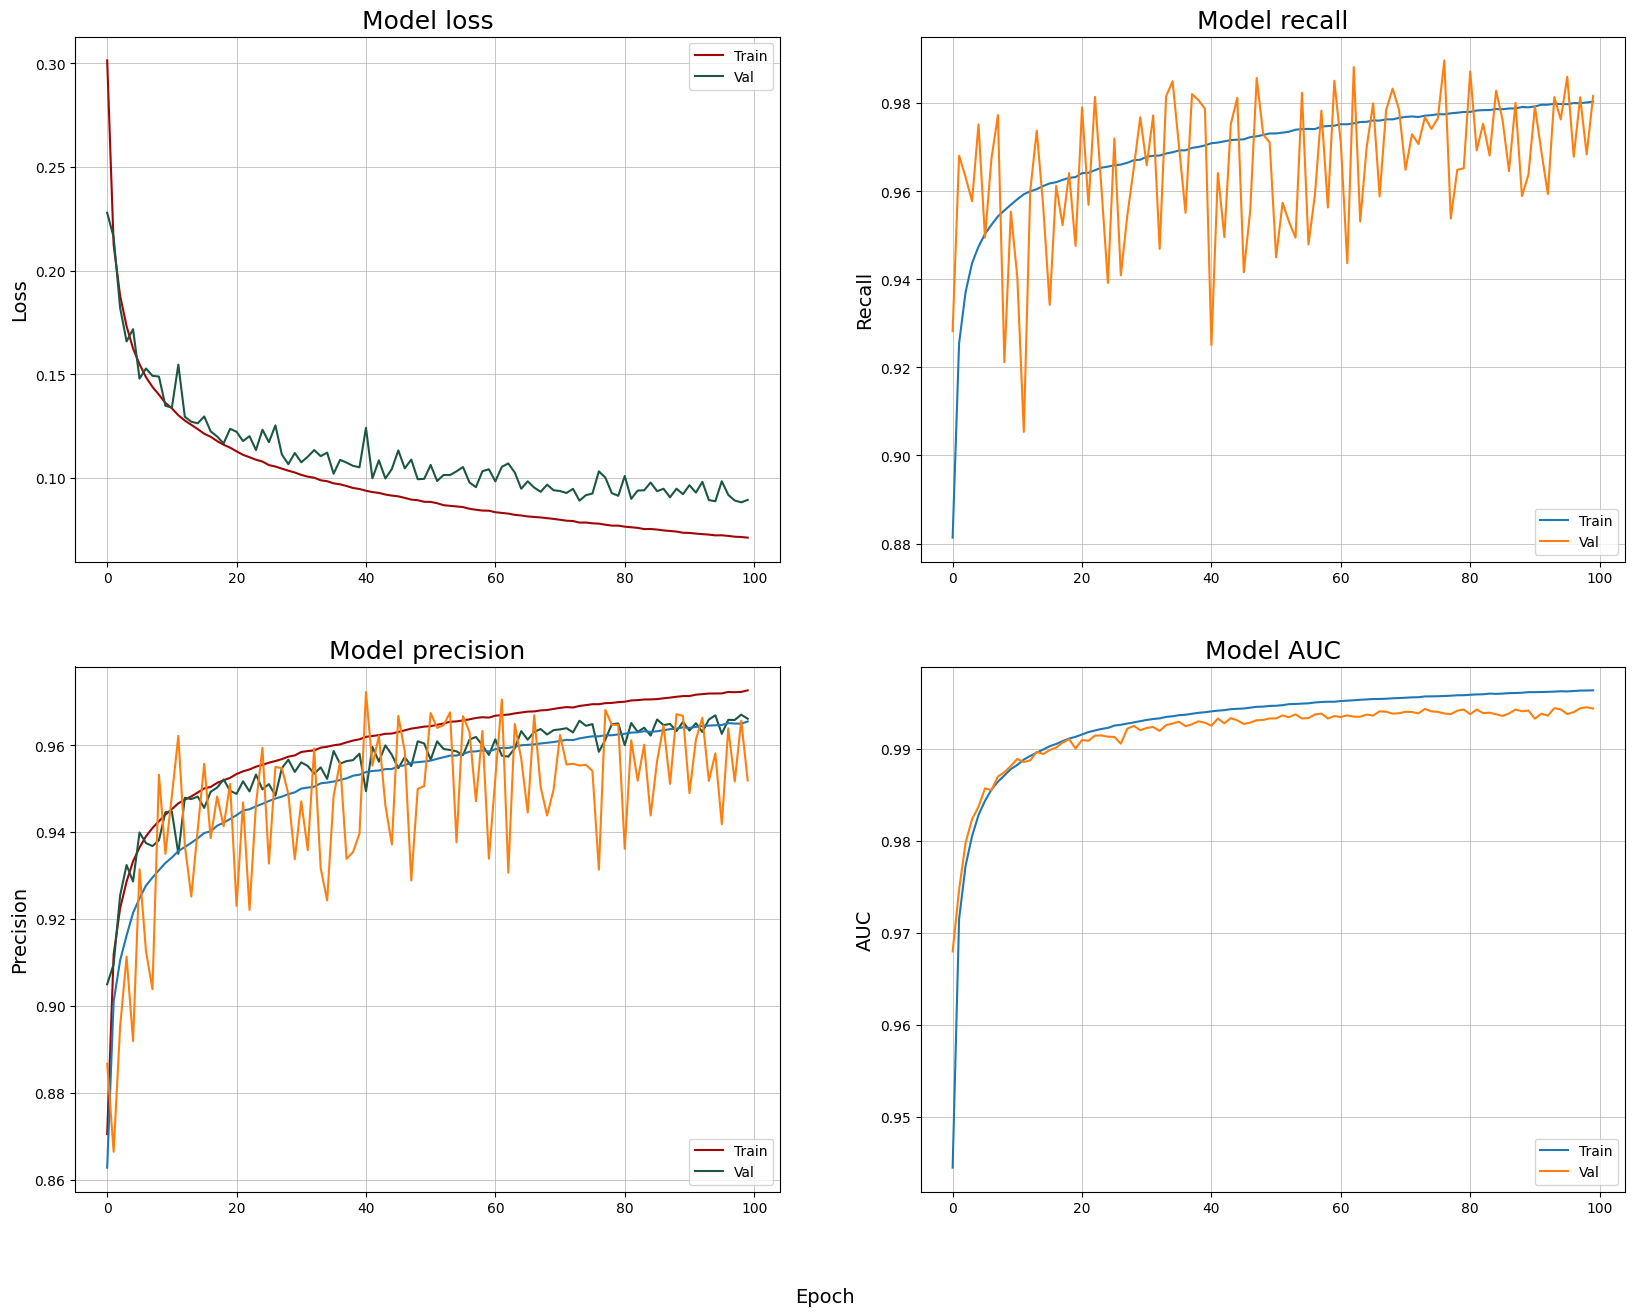

In [17]:
plot_loss_precision_recall_curve(history)

# DL model with UNBALANCED data

### Baseline accuracy

In [81]:
print(f'The baseline accuracy if we assume that all patients will show-up is {y.value_counts()[1] / X.shape[0]}')

The baseline accuracy if we assume that all patients will show-up is 0.9618598006025406


### Load and shuffle the data

In [93]:
data = pd.read_csv('/Users/alessio/code/janduplessis883/data-showup/data/output-data/full_train_data.csv')
data_shuffle = data.sample(frac=1, random_state=1).reset_index().drop(columns='index')

In [95]:
y.value_counts()[0]

34384

### Split in X and y

In [ ]:
X = data_shuffle.drop(columns=['Appointment_status'])
y = data_shuffle['Appointment_status']

### Split in Train and Test

In [84]:
X_train, X_test, y_train, y_test = perform_train_test_split(X,y)

✅ OUTPUT: X_train, X_test, y_train, y_test
Train Set:  X_train, y_train - (721212, 36), (721212,)
 Test Set:  X_test, y_test - - (180304, 36), (180304,)


### Scale X_train and X_test

In [85]:
def mm_scaler(X_train, X_test):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = mm_scaler(X_train, X_test)

### Split Train and Validation

In [ ]:
X_train, X_val, y_train, y_val = perform_train_test_split(X_train, y_train)

### Model for UNBALANCED data

In [68]:
# model = Sequential()
# es = EarlyStopping(patience=30, monitor='val_accuracy', restore_best_weights=True)

# model.add(layers.Dense(512, activation='relu', input_dim=X.shape[1]))
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

# adam = tf.keras.optimizers.Adam(learning_rate=0.00001)

# model.compile(loss='binary_crossentropy', optimizer=adam, metrics=metrics)

# history = model.fit(X_train_UNB, y_train_UNB,
#                     validation_data=(X_val_UNB, y_val_UNB),
#                     batch_size=128,
#                     epochs=100,
#                     callbacks=[es])

Epoch 1/100
4508/4508 [==============================] - 26s 5ms/step - loss: 0.1677 - accuracy: 0.9611 - recall: 0.9861 - precision: 0.9570 - auc: 0.9804 - val_loss: 0.1472 - val_accuracy: 0.9621 - val_recall: 1.0000 - val_precision: 0.9621 - val_auc: 0.7321
Epoch 2/100
4508/4508 [==============================] - 23s 5ms/step - loss: 0.1437 - accuracy: 0.9620 - recall: 0.9999 - precision: 0.9621 - auc: 0.7590 - val_loss: 0.1416 - val_accuracy: 0.9621 - val_recall: 0.9998 - val_precision: 0.9623 - val_auc: 0.7752
Epoch 3/100
4508/4508 [==============================] - 24s 5ms/step - loss: 0.1387 - accuracy: 0.9620 - recall: 0.9996 - precision: 0.9623 - auc: 0.7943 - val_loss: 0.1372 - val_accuracy: 0.9621 - val_recall: 0.9996 - val_precision: 0.9625 - val_auc: 0.8034
Epoch 4/100
4508/4508 [==============================] - 24s 5ms/step - loss: 0.1351 - accuracy: 0.9620 - recall: 0.9996 - precision: 0.9623 - auc: 0.8155 - val_loss: 0.1346 - val_accuracy: 0.9622 - val_recall: 0.9998 - 

KeyboardInterrupt: 